In [379]:
import pandas as pd
import polars as pl
import polars.selectors as cs

import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
pl.Config.set_tbl_width_chars(200)


polars.config.Config

In [37]:
path  = './youtube/GBvideos.csv'

# Data Read In

In [38]:
%%time
df_pl = pl.read_csv(path)

CPU times: user 95.9 ms, sys: 114 ms, total: 210 ms
Wall time: 162 ms


In [39]:
%%time
df_pd = pd.read_csv(path)

CPU times: user 239 ms, sys: 37.1 ms, total: 276 ms
Wall time: 279 ms


## Common Exploratory Methods

In [40]:
print(df_pd.shape)
display(df_pd.head(2))
display(df_pd.tail(2))
display(df_pd.sample(2))

(38916, 16)


video_id trending_date                                          title  \
0  Jw1Y-zhQURU      17.14.11  John Lewis Christmas Ad 2017 - #MozTheMonster   
1  3s1rvMFUweQ      17.14.11      Taylor Swift: ‚Ä¶Ready for It? (Live) - SNL   

         channel_title  category_id              publish_time  \
0           John Lewis           26  2017-11-10T07:38:29.000Z   
1  Saturday Night Live           24  2017-11-12T06:24:44.000Z   

                                                tags    views  likes  \
0  christmas|"john lewis christmas"|"john lewis"|...  7224515  55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...  1053632  25561   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   

                                         description  
0  Click here to continue the story and make your...  
1  Musical guest Taylor Swift performs ‚Ä¶Ready for...

video_id trending_date  \
38914  -DRsfNObKIQ      18.14.06   
38915  4YFo4bdMO8Q      18.14.06   

                                                   title  \
38914  Eleni Foureira - Fuego - Cyprus - LIVE - First...   
38915  KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...   

                 channel_title  category_id              publish_time  \
38914  Eurovision Song Contest           24  2018-05-08T20:32:32.000Z   
38915           SuperDuperKyle           10  2018-05-11T04:06:35.000Z   

                                                    tags     views   likes  \
38914  Eurovision Song Contest|"2018"|"Lisbon"|"Cypru...  14317515  151870   
38915  Kyle|"SuperDuperKyle"|"Ikuyo"|"2 Chainz"|"Soph...    607552   18271   

       dislikes  comment_count  \
38914     45875          26766   
38915       274           1423   

                                       thumbnail_link  comments_disabled  \
38914  https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg              False   
38915  https://i.ytimg.com/vi/4YFo4bdMO8Q/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
38914             False                   False   
38915             False                   False   

                                             description  
38914  Eleni Foureira represented Cyprus at the first...  
38915  Debut album 'Light of Mine' out now: http://ky...

video_id trending_date  \
3447   UVaeRX9LybU      17.01.12   
16138  wqS9QwOIH3s      18.04.02   

                                                   title     channel_title  \
3447   PREGNANCY ANNOUNCEMENT After Two Miscarriages ...   Ellie and Jared   
16138  Natural Defined Instagram Makeup | Jessica Cle...  Jessica Clements   

       category_id              publish_time  \
3447            22  2017-11-27T17:42:18.000Z   
16138           26  2018-01-24T22:00:05.000Z   

                                                    tags    views  likes  \
3447   ellie and jared|"ellie mecham"|"jared mecham"|...  1005203  56278   
16138  Natural Defined Instagram Makeup|"jessica clem...   241161  12196   

       dislikes  comment_count  \
3447       1879          14032   
16138       120            471   

                                       thumbnail_link  comments_disabled  \
3447   https://i.ytimg.com/vi/UVaeRX9LybU/default.jpg              False   
16138  https://i.ytimg.com/vi/wqS9QwOIH3s/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
3447              False                   False   
16138             False                   False   

                                             description  
3447   It's finally time to let you know. Ellie is PR...  
16138  Natural Defined Instagram Makeup | Jessica Cle...

In [41]:
print(df_pl.shape)
print(df_pl.head(2))
print(df_pl.tail(2))
print(df_pl.sample(2))

(38916, 16)
shape: (2, 16)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ video_id    ‚îÜ trending_date ‚îÜ title                             ‚îÜ channel_title       ‚îÜ ‚Ä¶ ‚îÜ comments_disabled ‚îÜ ratings_disabled ‚îÜ video_error_or_removed ‚îÜ description                       ‚îÇ
‚îÇ ---         ‚îÜ ---           ‚îÜ ---                               ‚îÜ ---                 ‚îÜ   ‚îÜ ---               ‚îÜ ---              ‚îÜ ---                    ‚îÜ -

### Column Selection

#### Data Types

In [84]:
%%timeit
numeric_data_pl = df_pl.select(cs.numeric())
categorical_data_pl = df_pl.select(cs.string())

84.2 ¬µs ¬± 10.6 ¬µs per loop (mean ¬± std. dev. of 7 runs, 10,000 loops each)


In [85]:
%%timeit
numeric_data_pd = df_pd.select_dtypes(include="number")
categorical_data_pd = df_pd.select_dtypes(exclude="number")

617 ¬µs ¬± 33.6 ¬µs per loop (mean ¬± std. dev. of 7 runs, 1,000 loops each)


In [72]:
print(numeric_data_pl.head())

shape: (5, 5)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ category_id ‚îÜ views    ‚îÜ likes  ‚îÜ dislikes ‚îÜ comment_count ‚îÇ
‚îÇ ---         ‚îÜ ---      ‚îÜ ---    ‚îÜ ---      ‚îÜ ---           ‚îÇ
‚îÇ i64         ‚îÜ i64      ‚îÜ i64    ‚îÜ i64      ‚îÜ i64           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 26          ‚îÜ 7224515  ‚îÜ 55681  ‚îÜ 10247    ‚îÜ 9479          ‚îÇ
‚îÇ 24          ‚îÜ 1053632  ‚îÜ 25561  ‚îÜ 2294     ‚îÜ 2757          ‚îÇ
‚îÇ 10          ‚îÜ 17158579 ‚îÜ 787420 ‚îÜ 43420    ‚îÜ 125882        ‚îÇ
‚îÇ 17          ‚îÜ 27833    ‚îÜ 193    ‚îÜ 12       ‚îÜ 37            ‚îÇ
‚îÇ 25          ‚îÜ 9815     ‚îÜ 30     ‚îÜ 2        ‚îÜ 30            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ

In [73]:
print(categorical_data_pl.head())

shape: (5, 8)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ video_id    ‚îÜ trending_date ‚îÜ title                       ‚îÜ channel_title         ‚îÜ publish_time             ‚îÜ tags                        ‚îÜ thumbnail_link             ‚îÜ description                ‚îÇ
‚îÇ ---         ‚îÜ ---           ‚îÜ ---                         ‚îÜ ---                   ‚îÜ ---                      ‚îÜ ---                         ‚îÜ ---      

#### Column names

In [448]:
subset_pl = df_pl.select(
    pl.col("likes"), 
    pl.col("views"),
    pl.col("comment_count")
)
susbet_pd = df_pd[["likes", "views", "comment_count"]]

## Data Quality Checks

In [91]:
%%time
missing = df_pd.isna().sum()
missing = missing[missing > 0]
static = df_pd.nunique() == 1
static = static[static]

print("Missing rows:")
print(missing)
print("\nStatic Columns:")
print(static)

Missing rows:
description    612
dtype: int64

Static Columns:
Series([], dtype: bool)
CPU times: user 56 ms, sys: 2.9 ms, total: 58.9 ms
Wall time: 57.7 ms


In [92]:
%%time
missing = (
    df_pl.select(pl.all().is_null().sum())
    .melt(value_name="missing")
    .filter(pl.col("missing") > 0)
)
static = (
    df_pl.select(pl.all().n_unique())
    .melt(value_name="unique")
    .filter(pl.col("unique") == 1)
)
print("Missing columns:")
print(missing)

print("\nStatic columns:")
print(static)

Missing columns:
shape: (0, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ variable ‚îÜ missing ‚îÇ
‚îÇ ---      ‚îÜ ---     ‚îÇ
‚îÇ str      ‚îÜ u32     ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Static columns:
shape: (0, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ variable ‚îÜ unique ‚îÇ
‚îÇ ---      ‚îÜ ---    ‚îÇ
‚îÇ str      ‚îÜ u32    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
CPU times: user 20 ms, sys: 7.28 ms, total: 27.2 ms
Wall time: 7.86 ms


## Cleaning

### Date Conversion

In [94]:
%%time
df_pd['publish_time'] = pd.to_datetime(df_pd['publish_time'])
df_pd['trending_date'] = pd.to_datetime(
    df_pd['trending_date'], format='%y.%d.%m'
)

CPU times: user 11.1 ms, sys: 13.4 ms, total: 24.5 ms
Wall time: 30 ms


In [95]:
%%time
df_pl = df_pl.with_columns(
    pl.col('trending_date').str.to_date(format='%y.%d.%m'),
    pl.col('publish_time').str.to_datetime()
)

CPU times: user 15.9 ms, sys: 5.55 ms, total: 21.5 ms
Wall time: 23.8 ms


### Category ID lookup

In [96]:
import json

with open('./youtube/US_category_id.json', 'r') as f:
    categories = json.load(f)
    
id_to_category = {}
for c in categories['items']:
    id_to_category[int(c['id'])] = c['snippet']['title']

In [97]:
%%time
df_pd['category_id'] = df_pd['category_id'].map(id_to_category)

CPU times: user 3.16 ms, sys: 3.37 ms, total: 6.53 ms
Wall time: 4.87 ms


In [98]:
%%time
df_pl = df_pl.with_columns(pl.col("category_id").map_dict(id_to_category))

CPU times: user 3.57 ms, sys: 11.2 ms, total: 14.8 ms
Wall time: 11.2 ms


## Univariate Analysis

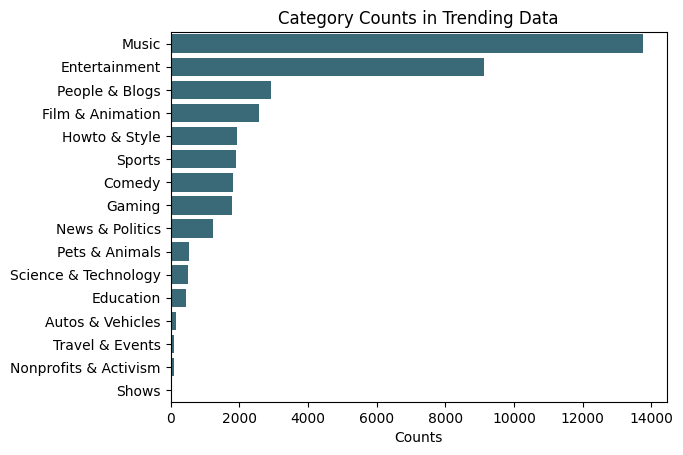

In [386]:
category_counts = df_pl["category_id"].value_counts(sort=True)

# Barplot
sns.barplot(
    y=category_counts["category_id"].to_numpy(),
    x=category_counts["counts"].to_numpy(),
    color="#306e81",
)
plt.title("Category Counts in Trending Data")
plt.xlabel("Counts")
plt.show()

In [398]:
views_stats = df_pl.select(pl.col("views")).describe()
print(views_stats)

shape: (9, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ describe   ‚îÜ views        ‚îÇ
‚îÇ ---        ‚îÜ ---          ‚îÇ
‚îÇ str        ‚îÜ f64          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count      ‚îÜ 38916.0      ‚îÇ
‚îÇ null_count ‚îÜ 0.0          ‚îÇ
‚îÇ mean       ‚îÜ 5.9119e6     ‚îÇ
‚îÇ std        ‚îÜ 1.9001e7     ‚îÇ
‚îÇ min        ‚îÜ 851.0        ‚îÇ
‚îÇ max        ‚îÜ 4.24538912e8 ‚îÇ
‚îÇ median     ‚îÜ 981889.0     ‚îÇ
‚îÇ 25%        ‚îÜ 251532.0     ‚îÇ
‚îÇ 75%        ‚îÜ 3.683945e6   ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


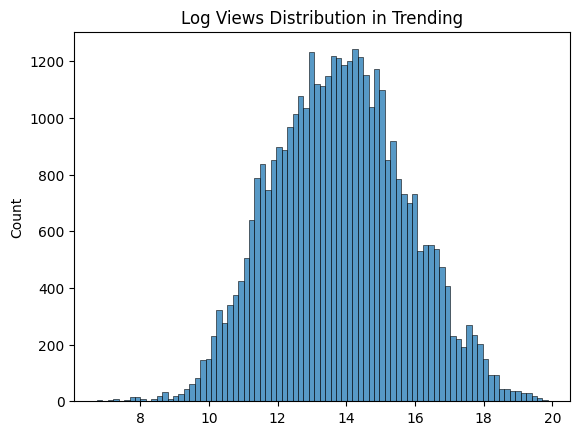

In [407]:
sns.histplot(df_pl['views'].log())
plt.title("Log Views Distribution in Trending")
plt.show()

### Multivariate Analysis

In [427]:
views_by_category = df_pl.groupby(pl.col("category_id")).agg(pl.col("views").median().alias("median_views")).sort("median_views", descending=True)
print(views_by_category)

shape: (16, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ category_id      ‚îÜ median_views ‚îÇ
‚îÇ ---              ‚îÜ ---          ‚îÇ
‚îÇ str              ‚îÜ f64          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Music            ‚îÜ 2.980744e6   ‚îÇ
‚îÇ Shows            ‚îÜ 1498767.5    ‚îÇ
‚îÇ Comedy           ‚îÜ 1278302.5    ‚îÇ
‚îÇ Film & Animation ‚îÜ 1.144917e6   ‚îÇ
‚îÇ ‚Ä¶                ‚îÜ ‚Ä¶            ‚îÇ
‚îÇ Gaming           ‚îÜ 309154.5     ‚îÇ
‚îÇ Howto & Style    ‚îÜ 263412.0     ‚îÇ
‚îÇ News & Politics  ‚îÜ 229753.0     ‚îÇ
‚îÇ Travel & Events  ‚îÜ 218176.0     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


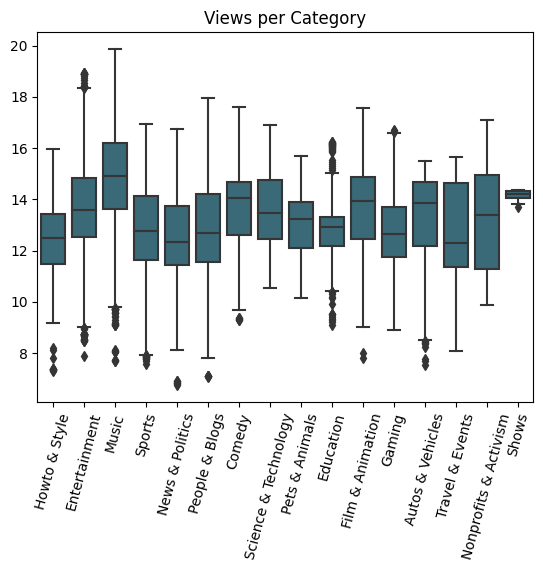

In [429]:
sns.boxplot(x=df_pl['category_id'].to_numpy(), y=df_pl['views'].log().to_numpy(), color="#306e81")
plt.title("Views per Category")
plt.xticks(rotation=75)
plt.show()

In [389]:
df_pl.select(
    pl.col("views").mean().alias(""),
    pl.col("views").median(),
    pl.col("views").quantile(0.25),
    pl.col("views").quantile(0.75),
    pl.col("views").max(),
)

DuplicateError: column with name 'views' has more than one occurrences

## Analysis

In [183]:
# Who's the most frequent channels?
print(df_pl['channel_title'].value_counts(sort=True).head(5))

shape: (5, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ channel_title                     ‚îÜ counts ‚îÇ
‚îÇ ---                               ‚îÜ ---    ‚îÇ
‚îÇ str                               ‚îÜ u32    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ The Tonight Show Starring Jimmy ‚Ä¶ ‚îÜ 208    ‚îÇ
‚îÇ TheEllenShow                      ‚îÜ 207    ‚îÇ
‚îÇ Jimmy Kimmel Live                 ‚îÜ 207    ‚îÇ
‚îÇ Saturday Night Live               ‚îÜ 206    ‚îÇ
‚îÇ WWE                               ‚îÜ 205    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [227]:
channel_popularity = (
    df_pl.groupby(pl.col("channel_title"))
    .agg(pl.count().alias("trending_count"))
    .sort(pl.col("trending_count"), descending=True)
)

print(channel_popularity.head())

shape: (5, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ channel_title                     ‚îÜ trending_count ‚îÇ
‚îÇ ---                               ‚îÜ ---            ‚îÇ
‚îÇ str                               ‚îÜ u32            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ The Tonight Show Starring Jimmy ‚Ä¶ ‚îÜ 208            ‚îÇ
‚îÇ Jimmy Kimmel Live                 ‚îÜ 207            ‚îÇ
‚îÇ TheEllenShow                      ‚îÜ 207            ‚îÇ
‚îÇ Saturday Night Live               ‚îÜ 206            ‚îÇ
‚îÇ WWE                               ‚îÜ 205            ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [218]:
# Who's the most frequent channels?
print(df_pd['channel_title'].value_counts(sort=True).head(5))

The Tonight Show Starring Jimmy Fallon    208
Jimmy Kimmel Live                         207
TheEllenShow                              207
Saturday Night Live                       206
WWE                                       205
Name: channel_title, dtype: int64


In [294]:
df_pl.head()

shape: (5, 16)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ video_id    ‚îÜ trending_date ‚îÜ title                             ‚îÜ channel_title              ‚îÜ ‚Ä¶ ‚îÜ comments_disabled ‚îÜ ratings_disabled ‚îÜ video_error_or_removed ‚îÜ description                       ‚îÇ
‚îÇ ---         ‚îÜ ---           ‚îÜ ---                               ‚îÜ ---                        ‚îÜ   ‚îÜ ---               ‚îÜ ---              ‚îÜ ---                    ‚îÜ ---                               ‚îÇ
‚îÇ str         ‚îÜ date          ‚îÜ str                               ‚îÜ str                        ‚îÜ   ‚îÜ bool              ‚îÜ bool             ‚îÜ bool                   ‚îÜ str                               ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Jw1Y-zhQURU ‚îÜ 2017-11-14    ‚îÜ John Lewis Christmas Ad 2017 - #‚Ä¶ ‚îÜ John Lewis                 ‚îÜ ‚Ä¶ ‚îÜ false             ‚îÜ false            ‚îÜ false                  ‚îÜ Click here to continue the story‚Ä¶ ‚îÇ
‚îÇ 3s1rvMFUweQ ‚îÜ 2017-11-14    ‚îÜ Taylor Swift: ‚Ä¶Ready for It? (Li‚Ä¶ ‚îÜ Saturday Night Live        ‚îÜ ‚Ä¶ ‚îÜ false             ‚îÜ false            ‚îÜ false                  ‚îÜ Musical guest Taylor Swift perfo‚Ä¶ ‚îÇ
‚îÇ n1WpP7iowLc ‚îÜ 2017-11-14    ‚îÜ Eminem - Walk On Water (Audio) f‚Ä¶ ‚îÜ EminemVEVO                 ‚îÜ ‚Ä¶ ‚îÜ false             ‚îÜ false            ‚îÜ false                  ‚îÜ Eminem's new track Walk on Water‚Ä¶ ‚îÇ
‚îÇ PUTEiSjKwJU ‚îÜ 2017-11-14    ‚îÜ Goals from Salford City vs Class‚Ä¶ ‚îÜ Salford City Football Club ‚îÜ ‚Ä¶ ‚îÜ false             ‚îÜ false            ‚îÜ false                  ‚îÜ Salford drew 4-4 against the Cla‚Ä¶ ‚îÇ
‚îÇ rHwDegptbI4 ‚îÜ 2017-11-14    ‚îÜ Dashcam captures truck's near mi‚Ä¶ ‚îÜ Cute Girl Videos           ‚îÜ ‚Ä¶ ‚îÜ false             ‚îÜ false            ‚îÜ false                  ‚îÜ Dashcam captures truck's near mi‚Ä¶ ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [292]:
channel_stats_pl = df_pl.groupby("channel_title").agg([
    pl.count().alias("trending_count"),
    pl.col("title").n_unique().alias("number_of_trending_videos"),
    pl.col("views").sum().alias("total_views"),
    pl.col("likes").sum().alias("total_likes"),
    pl.col("comment_count").sum().alias("total_comments"),
    pl.col("views").mean().alias("average_views"),
    pl.col("likes").mean().alias("average_likes"),
    pl.col("comment_count").mean().alias("average_comments"),
])
channel_stats_pl.sample(5)

shape: (5, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ channel_title    ‚îÜ trending_count ‚îÜ number_of_trending_videos ‚îÜ total_views ‚îÜ ‚Ä¶ ‚îÜ total_comments ‚îÜ average_views ‚îÜ average_likes ‚îÜ average_comments ‚îÇ
‚îÇ ---              ‚îÜ ---            ‚îÜ ---                       ‚îÜ ---         ‚îÜ   ‚îÜ ---            ‚îÜ ---           ‚îÜ ---           ‚îÜ ---              ‚îÇ
‚îÇ str              ‚îÜ u32            ‚îÜ u32                       ‚îÜ i64         ‚îÜ   ‚îÜ i64            ‚îÜ f64           ‚îÜ f64           ‚îÜ f64              ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ NickiMinajAtVEVO ‚îÜ 57             ‚îÜ 2                         ‚îÜ 1622519478  ‚îÜ ‚Ä¶ ‚îÜ 4086059        ‚îÜ 2.8465254e7   ‚îÜ 675718.859649 ‚îÜ 71685.245614     ‚îÇ
‚îÇ gattu            ‚îÜ 20             ‚îÜ 1                         ‚îÜ 11275506    ‚îÜ ‚Ä¶ ‚îÜ 13104          ‚îÜ 563775.3      ‚îÜ 2825.1        ‚îÜ 655.2            ‚îÇ
‚îÇ The Real Daytime ‚îÜ 28             ‚îÜ 3                         ‚îÜ 4802499     ‚îÜ ‚Ä¶ ‚îÜ 20815          ‚îÜ 171517.821429 ‚îÜ 5068.678571   ‚îÜ 743.392857       ‚îÇ
‚îÇ YandelVEVO       ‚îÜ 35             ‚îÜ 1                         ‚îÜ 1495491717  ‚îÜ ‚Ä¶ ‚îÜ 325369         ‚îÜ 4.2728e7      ‚îÜ 309336.171429 ‚îÜ 9296.257143      ‚îÇ
‚îÇ durbeyfield      ‚îÜ 13             ‚îÜ 1                         ‚îÜ 5537322     ‚îÜ ‚Ä¶ ‚îÜ 61121          ‚îÜ 425947.846154 ‚îÜ 20312.846154  ‚îÜ 4701.615385      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [326]:
def make_aggregates(df: pl.DataFrame, groupby: str, agg_features: list[str]) -> pl.DataFrame:
    # Aggregates that measure popularity using video counts
    popularity_aggs = [
        pl.count().alias("trending_count"),
        pl.col("title").n_unique().alias("number_of_trending_videos"),
    ]
    # Aggregates that measure popularity using metrics of the videos
    metrics_agg = []
    for agg in agg_features:
        if agg not in df.columns:
            print(f"{agg} not in the dataframe. Skipping...")
        else:
            metrics_agg.append(pl.col(agg).sum().alias(f"total_{agg}"))
            metrics_agg.append(pl.col(agg).mean().alias(f"average_{agg}"))

    stats = df.groupby(groupby).agg(popularity_aggs + metrics_agg)
    stats = stats.sort("trending_count", descending=True)
    return stats

In [335]:
channel_aggs = make_aggregates(
    df=df_pl, groupby="channel_title", agg_features=["views", "likes", "comment_count"]
)
category_aggs = make_aggregates(
    df=df_pl, groupby="category_id", agg_features=["views", "likes", "comment_count"]
)

print("Top Channels")
print(channel_aggs.head())

print("\nTop Categories")
print(category_aggs.head())

Top Channels
shape: (5, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ channel_title                     ‚îÜ trending_count ‚îÜ number_of_trending_videos ‚îÜ total_views ‚îÜ ‚Ä¶ ‚îÜ total_likes ‚îÜ average_likes ‚îÜ total_comment_count ‚îÜ average_comment_count ‚îÇ
‚îÇ ---                               ‚îÜ ---            ‚îÜ ---                       ‚îÜ ---         ‚îÜ   ‚îÜ ---         ‚îÜ ---           ‚îÜ ---                 ‚îÜ ---                   ‚îÇ
‚îÇ str                               ‚îÜ u32   

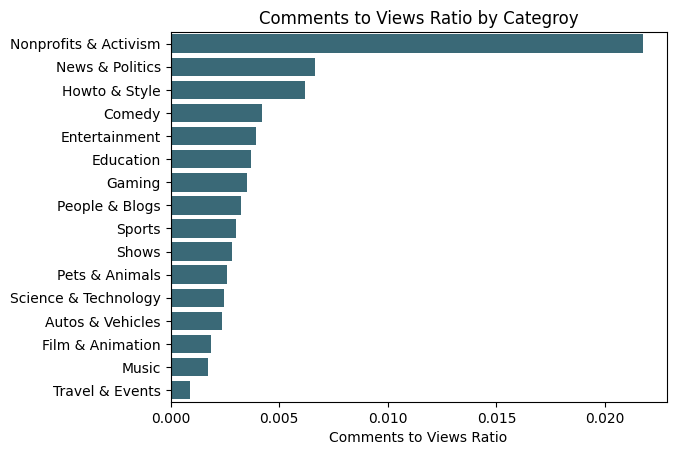

In [374]:


# Calcualte ratio
comments_views_ratio = category_aggs.select(
    pl.col("category_id"),
    comments_views_ratio=pl.col("total_comment_count") / pl.col("total_views")
).sort("comments_views_ratio", descending=True)

# Barplot
sns.barplot(
    y=comments_views_ratio["category_id"].to_numpy(),
    x=comments_views_ratio["comments_views_ratio"].to_numpy(),
    color="#306e81",
)
plt.title("Comments to Views Ratio by Categroy")
plt.xlabel("Comments to Views Ratio")
plt.show()

In [433]:
channel_aggs.write_parquet("./data/channel_aggs.parquet")
category_aggs.write_parquet("./data/category_aggs.parquet")

In [368]:
category_aggs.select([pl.col('category_id'),pl.col('trending_count')])

shape: (16, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ category_id           ‚îÜ trending_count ‚îÇ
‚îÇ ---                   ‚îÜ ---            ‚îÇ
‚îÇ str                   ‚îÜ u32            ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Music                 ‚îÜ 13754          ‚îÇ
‚îÇ Entertainment         ‚îÜ 9124           ‚îÇ
‚îÇ People & Blogs        ‚îÜ 2926           ‚îÇ
‚îÇ Film & Animation      ‚îÜ 2577           ‚îÇ
‚îÇ ‚Ä¶                     ‚îÜ ‚Ä¶              ‚îÇ
‚îÇ Autos & Vehicles      ‚îÜ 144            ‚îÇ
‚îÇ Travel & Events       ‚îÜ 96             ‚îÇ
‚îÇ Nonprofits & Activism ‚îÜ 90             ‚îÇ
‚îÇ Shows                 ‚îÜ 20             ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [364]:
category_aggs[['category_id','trending_count']]

shape: (16, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ category_id           ‚îÜ trending_count ‚îÜ number_of_trending_videos ‚îÜ total_views  ‚îÜ ‚Ä¶ ‚îÜ total_likes ‚îÜ average_likes ‚îÜ total_comment_count ‚îÜ average_comment_count ‚îÇ
‚îÇ ---                   ‚îÜ ---            ‚îÜ ---                       ‚îÜ ---          ‚îÜ   ‚îÜ ---         ‚îÜ ---           ‚îÜ ---                 ‚îÜ ---                   ‚îÇ
‚îÇ str                   ‚îÜ u32            ‚îÜ u32                       ‚îÜ i64          ‚îÜ   ‚îÜ i64         ‚îÜ f64           ‚îÜ i64                 ‚îÜ f64                   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ Music                 ‚îÜ 13754          ‚îÜ 910                       ‚îÜ 171160864769 ‚îÜ ‚Ä¶ ‚îÜ 3742993052  ‚îÜ 272138.508943 ‚îÜ 293013140           ‚îÜ 21303.849062          ‚îÇ
‚îÇ Entertainment         ‚îÜ 9124           ‚îÜ 884                       ‚îÜ 29786283041  ‚îÜ ‚Ä¶ ‚îÜ 744266231   ‚îÜ 81572.362012  ‚îÜ 116897440           ‚îÜ 12812.08242           ‚îÇ
‚îÇ People & Blogs        ‚îÜ 2926           ‚îÜ 293                       ‚îÜ 5754287829   ‚îÜ ‚Ä¶ ‚îÜ 135396249   ‚îÜ 46273.495899  ‚îÜ 18713149            ‚îÜ 6395.471292           ‚îÇ
‚îÇ Film & Animation      ‚îÜ 2577           ‚îÜ 201                       ‚îÜ 8362707626   ‚îÜ ‚Ä¶ ‚îÜ 147418633   ‚îÜ 57205.523089  ‚îÜ 15590011            ‚îÜ 6049.674428           ‚îÇ
‚îÇ ‚Ä¶                     ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶                         ‚îÜ ‚Ä¶            ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶           ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶                   ‚îÜ ‚Ä¶                     ‚îÇ
‚îÇ Autos & Vehicles      ‚îÜ 144            ‚îÜ 14                        ‚îÜ 214184514    ‚îÜ ‚Ä¶ ‚îÜ 3543625     ‚îÜ 24608.506944  ‚îÜ 505085              ‚îÜ 3507.534722           ‚îÇ
‚îÇ Travel & Events       ‚îÜ 96             ‚îÜ 10                        ‚îÜ 132784993    ‚îÜ ‚Ä¶ ‚îÜ 928747      ‚îÜ 9674.447917   ‚îÜ 118177              ‚îÜ 1231.010417           ‚îÇ
‚îÇ Nonprofits & Activism ‚îÜ 90             ‚îÜ 6                         ‚îÜ 352798262    ‚îÜ ‚Ä¶ ‚îÜ 24452616    ‚îÜ 271695.733333 ‚îÜ 7672790             ‚îÜ 85253.222222          ‚îÇ
‚îÇ Shows                 ‚îÜ 20             ‚îÜ 1                         ‚îÜ 28583283     ‚îÜ ‚Ä¶ ‚îÜ 836738      ‚îÜ 41836.9       ‚îÜ 80957               ‚îÜ 4047.85               ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [290]:
%%timeit
channel_stats_pd = df_pd.groupby("channel_title").agg(
    trending_count=pd.NamedAgg(column="title", aggfunc="count"),
    number_of_trending_videos=pd.NamedAgg(column="title", aggfunc="nunique"),
    total_views=pd.NamedAgg(column="views", aggfunc="sum"),
    average_views=pd.NamedAgg(column="views", aggfunc="mean"),
    total_likes=pd.NamedAgg(column="likes", aggfunc="sum"),
    average_likes=pd.NamedAgg(column="likes", aggfunc="mean"),
    total_comments=pd.NamedAgg(column="comment_count", aggfunc="sum"),
    average_comments=pd.NamedAgg(column="comment_count", aggfunc="mean"),
)
channel_stats_pd.sample(5)

10.4 ms ¬± 146 ¬µs per loop (mean ¬± std. dev. of 7 runs, 100 loops each)


In [291]:
channel_stats_pl.head()

shape: (5, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ channel_title ‚îÜ trending_count ‚îÜ number_of_trending_videos ‚îÜ total_views ‚îÜ ‚Ä¶ ‚îÜ total_comments ‚îÜ average_views ‚îÜ average_likes ‚îÜ average_comments ‚îÇ
‚îÇ ---           ‚îÜ ---            ‚îÜ ---                       ‚îÜ ---         ‚îÜ   ‚îÜ ---            ‚îÜ ---           ‚îÜ ---           ‚îÜ ---              ‚îÇ
‚îÇ str           ‚îÜ u32            ‚îÜ u32                       ‚îÜ i64         ‚îÜ   ‚îÜ i64            ‚îÜ f64           ‚îÜ f64           ‚îÜ f64              ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ HANSON        ‚îÜ 10             ‚îÜ 1                         ‚îÜ 950543      ‚îÜ ‚Ä¶ ‚îÜ 2470           ‚îÜ 95054.3       ‚îÜ 2294.7        ‚îÜ 247.0            ‚îÇ
‚îÇ WINNER        ‚îÜ 44             ‚îÜ 2                         ‚îÜ 513504917   ‚îÜ ‚Ä¶ ‚îÜ 1656714        ‚îÜ 1.1671e7      ‚îÜ 403117.681818 ‚îÜ 37652.590909     ‚îÇ
‚îÇ Bhad Bhabie   ‚îÜ 117            ‚îÜ 9                         ‚îÜ 1554568224  ‚îÜ ‚Ä¶ ‚îÜ 4244735        ‚îÜ 1.3287e7      ‚îÜ 339103.564103 ‚îÜ 36279.786325     ‚îÇ
‚îÇ durbeyfield   ‚îÜ 13             ‚îÜ 1                         ‚îÜ 5537322     ‚îÜ ‚Ä¶ ‚îÜ 61121          ‚îÜ 425947.846154 ‚îÜ 20312.846154  ‚îÜ 4701.615385      ‚îÇ
‚îÇ Cole Bennett  ‚îÜ 80             ‚îÜ 5                         ‚îÜ 807800164   ‚îÜ ‚Ä¶ ‚îÜ 1657934        ‚îÜ 1.0098e7      ‚îÜ 252974.425    ‚îÜ 20724.175        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [130]:
df_pl.groupby(pl.col('channel_title')).agg(
    pl.count(),
    pl.col("trending_date").n_unique()
)

shape: (1_625, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ channel_title     ‚îÜ count ‚îÜ trending_date ‚îÇ
‚îÇ ---               ‚îÜ ---   ‚îÜ ---           ‚îÇ
‚îÇ str               ‚îÜ u32   ‚îÜ u32           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ FXitinPost        ‚îÜ 16    ‚îÜ 16            ‚îÇ
‚îÇ John Maclean      ‚îÜ 25    ‚îÜ 25            ‚îÇ
‚îÇ Sophie Louise     ‚îÜ 21    ‚îÜ 21            ‚îÇ
‚îÇ Slayer            ‚îÜ 12    ‚îÜ 12            ‚îÇ
‚îÇ ‚Ä¶                 ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶             ‚îÇ
‚îÇ Austin Evans      ‚îÜ 13    ‚îÜ 13            ‚îÇ
‚îÇ PartyHatCookieCat ‚îÜ 1     ‚îÜ 1             ‚îÇ
‚îÇ Lauv              ‚îÜ 36    ‚îÜ 36            ‚îÇ
‚îÇ The Summit        ‚îÜ 8     ‚îÜ 8             ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [126]:
%%time
popular = df_pl.groupby("channel_title").agg(pl.col('video_id').count()).sort('video_id', descending=True)

CPU times: user 4.45 ms, sys: 4.56 ms, total: 9.01 ms
Wall time: 1.61 ms


In [115]:
popular

shape: (1_625, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ channel_title                     ‚îÜ video_id ‚îÇ
‚îÇ ---                               ‚îÜ ---      ‚îÇ
‚îÇ str                               ‚îÜ u32      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ The Tonight Show Starring Jimmy ‚Ä¶ ‚îÜ 208      ‚îÇ
‚îÇ Jimmy Kimmel Live                 ‚îÜ 207      ‚îÇ
‚îÇ TheEllenShow                      ‚îÜ 207      ‚îÇ
‚îÇ Saturday Night Live               ‚îÜ 206      ‚îÇ
‚îÇ ‚Ä¶                                 ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ Endless Entertainment             ‚îÜ 1        ‚îÇ
‚îÇ MrRevillz                         ‚îÜ 1        ‚îÇ
‚îÇ SsM m                             ‚îÜ 1        ‚îÇ
‚îÇ zander                            ‚îÜ 1        ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [91]:
df_pd.head()

video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: ‚Ä¶Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyonc√©   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26 2017-11-10 07:38:29+00:00   
1         Saturday Night Live           24 2017-11-12 06:24:44+00:00   
2                  EminemVEVO           10 2017-11-10 17:00:03+00:00   
3  Salford City Football Club           17 2017-11-13 02:30:38+00:00   
4            Cute Girl Videos           25 2017-11-13 01:45:13+00:00   

                                                tags     views   likes  \
0  christmas|"john lewis christmas"|"john lewis"|...   7224515   55681   
1  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...   1053632   25561   
2  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787420   
3  Salford City FC|"Salford City"|"Salford"|"Clas...     27833     193   
4                                             [none]      9815      30   

   dislikes  comment_count                                  thumbnail_link  \
0     10247           9479  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
1      2294           2757  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   
2     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
3        12             37  https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg   
4         2             30  https://i.ytimg.com/vi/rHwDegptbI4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Click here to continue the story and make your...  
1  Musical guest Taylor Swift performs ‚Ä¶Ready for...  
2  Eminem's new track Walk on Water ft. Beyonc√© i...  
3  Salford drew 4-4 against the Class of 92 and F...  
4  Dashcam captures truck's near miss with child ...

In [65]:
df_pl.sort("description")

shape: (38_916, 16)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ video_ ‚îÜ trending_d ‚îÜ title  ‚îÜ channel_ti ‚îÜ ‚Ä¶ ‚îÜ comments_d ‚îÜ ratings_di ‚îÜ video_erro ‚îÜ descripti ‚îÇ
‚îÇ id     ‚îÜ ate        ‚îÜ ---    ‚îÜ tle        ‚îÜ   ‚îÜ isabled    ‚îÜ sabled     ‚îÜ r_or_remov ‚îÜ on        ‚îÇ
‚îÇ ---    ‚îÜ ---        ‚îÜ str    ‚îÜ ---        ‚îÜ   ‚îÜ ---        ‚îÜ ---        ‚îÜ ed         ‚îÜ ---       ‚îÇ
‚îÇ str    ‚îÜ str        ‚îÜ        ‚îÜ str        ‚îÜ   ‚îÜ bool       ‚îÜ bool       ‚îÜ ---        ‚îÜ str       ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ        ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ bool       ‚îÜ           ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ _wM_jY ‚îÜ 17.14.11   ‚îÜ Bone   ‚îÜ Ross       ‚îÜ ‚Ä¶ ‚îÜ true       ‚îÜ false      ‚îÜ false      ‚îÜ           ‚îÇ
‚îÇ _rass  ‚îÜ            ‚îÜ on     ‚îÜ Kempsell   ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ Labour ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ HQ     ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ 8HON4A ‚îÜ 17.14.11   ‚îÜ Arvo   ‚îÜ JSaxofone  ‚îÜ ‚Ä¶ ‚îÜ false      ‚îÜ false      ‚îÜ false      ‚îÜ           ‚îÇ
‚îÇ swPVk  ‚îÜ            ‚îÜ P√§rt - ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ Tabula ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ Rasa   ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ j5AILy ‚îÜ 17.14.11   ‚îÜ Brad   ‚îÜ EinsteinEn ‚îÜ ‚Ä¶ ‚îÜ false      ‚îÜ false      ‚îÜ false      ‚îÜ           ‚îÇ
‚îÇ sDDTI  ‚îÜ            ‚îÜ Bufand ‚îÜ t          ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ a Demo ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ Reel   ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ _wM_jY ‚îÜ 17.15.11   ‚îÜ Bone   ‚îÜ Ross       ‚îÜ ‚Ä¶ ‚îÜ true       ‚îÜ false      ‚îÜ false      ‚îÜ           ‚îÇ
‚îÇ _rass  ‚îÜ            ‚îÜ on     ‚îÜ Kempsell   ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ Labour ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ HQ     ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ ‚Ä¶      ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶          ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ Lu7a7z ‚îÜ 18.16.01   ‚îÜ G-Eazy ‚îÜ Trap       ‚îÜ ‚Ä¶ ‚îÜ false      ‚îÜ false      ‚îÜ false      ‚îÜ üî• G Eazy ‚îÇ
‚îÇ KbJo0  ‚îÜ            ‚îÜ &      ‚îÜ Nation     ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ & Halsey  ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ Halsey ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ - Him & I ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ - Him  ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ (RMN‚Ä¶     ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ & I    ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ            ‚îÜ            ‚îÜ           ‚îÇ
‚îÇ        ‚îÜ            ‚îÜ (RMND  ‚îÜ            ‚îÜ   ‚îÜ            ‚îÜ

* Longest video in trend
* Average length in trend
* Most popular channel
* Most popular category

In [21]:
%%time
df_pl['trending_date'].value_counts(sort=True).head()

CPU times: user 2.41 ms, sys: 2.55 ms, total: 4.96 ms
Wall time: 991 ¬µs


shape: (5, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ trending_date ‚îÜ counts ‚îÇ
‚îÇ ---           ‚îÜ ---    ‚îÇ
‚îÇ str           ‚îÜ u32    ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 17.14.11      ‚îÜ 200    ‚îÇ
‚îÇ 17.17.11      ‚îÜ 200    ‚îÇ
‚îÇ 17.18.11      ‚îÜ 200    ‚îÇ
‚îÇ 17.19.11      ‚îÜ 200    ‚îÇ
‚îÇ 17.20.11      ‚îÜ 200    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [22]:
%%time
df_pd['trending_date'].value_counts().head()

CPU times: user 1.9 ms, sys: 56 ¬µs, total: 1.96 ms
Wall time: 1.91 ms


17.14.11    200
18.02.01    200
18.29.01    200
18.28.01    200
18.27.01    200
Name: trending_date, dtype: int64